## A script for generating convergence plots

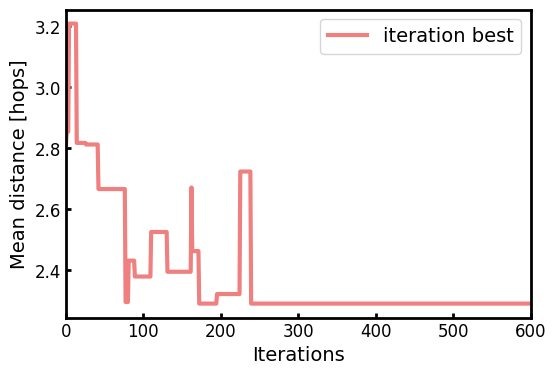

In [1]:
import matplotlib.pyplot as plt
import numpy as np

WHERE = "../data/ACO_3"
stats = np.load(WHERE+"/statistics.npy", allow_pickle=True).item()
mean_values = np.array(stats["mdn"])
std_values = np.array(stats["std"])
best_values = np.array(stats["best"])
best_values = np.array(stats["absolute_best"])
mean_distance = np.array(stats["mean_distance_absolute"])
# best_values = np.array([stats["absolute_best"][i][2] for i in range(1,len(stats["best"]))])

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# add mean line
# ax.plot(mean_values, label="iteration mean", color = "lightseagreen")
# fill between the -std and +std
# ax.fill_between(range(len(mean_values)), mean_values - std_values, mean_values + std_values, alpha=0.2, color = "mediumturquoise")
# add best line
ax.plot(mean_distance, label="iteration best", color = "lightcoral", linewidth=3)
ax.set_xlim(0, len(mean_values))
ax.tick_params(direction='in')
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.legend(fontsize=14)
plt.xlabel("Iterations", fontdict={"size": 14})
plt.ylabel("Mean distance [hops]", fontdict={"size": 14})
# plt.title("convergence", fontdict={"size": 16})
plt.show()

fig.savefig(WHERE +"/convergence.png", dpi=300)

Text(0, 0.5, 'Latency [cycles]')

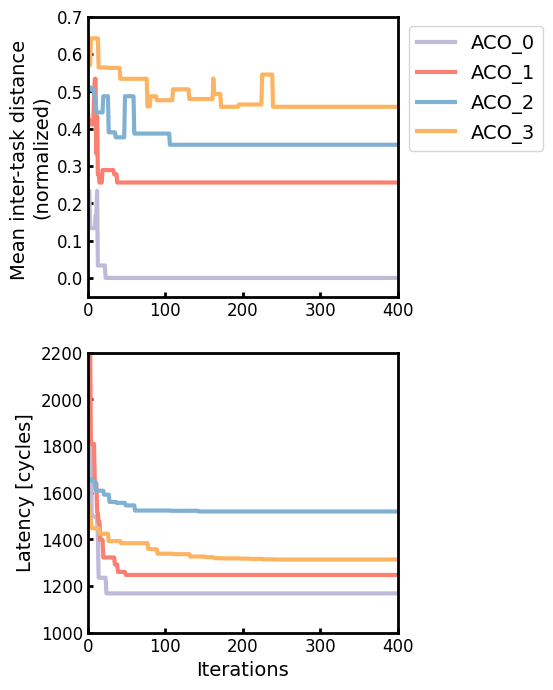

In [9]:


splittings = [0,1,2,3]
methods = ["ACO"]

WHERE = "../data/"
data = [ method+"_" + str(i) for i in splittings for method in methods ]

# set the colors using Set3 palette
colors = plt.get_cmap("Set3").colors[2:]
markers = ["D", "s"]
fig, axs = plt.subplots(2, 1, figsize=(4, 8))
for i, method in enumerate(data):
    stats = np.load(WHERE+method+"/statistics.npy", allow_pickle=True).item()
    mean_values = np.array(stats["mdn"])
    std_values = np.array(stats["std"])
    best_values = np.array(stats["absolute_best"]) if "ACO" in method else np.array(stats["best"])
    mean_distance = np.array(stats["mean_distance_absolute"])
    # best_values = np.array([stats["absolute_best"][i][2] for i in range(1,len(stats["best"]))])
    
    # add mean line
    axs[0].plot(mean_distance/5, label=method, linewidth=3, color=colors[i // len(methods)])
    axs[0].set_ylim(-0.05,0.7)
    axs[1].plot(best_values, label=method, linewidth=3, color=colors[i // len(methods)])
    axs[1].set_ylim(1000, 2200)

for ax in axs:
    ax.set_xlim(0, len(mean_values)-200)
    ax.tick_params(direction='in')
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.tick_params(axis='both', which='major', labelsize=12)

axs[0].legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.5, 1.), ncol=1)
axs[1].set_xlabel("Iterations", fontdict={"size": 14})
axs[0].set_ylabel("Mean inter-task distance \n(normalized)", fontdict={"size": 14})
axs[1].set_ylabel("Latency [cycles]", fontdict={"size": 14})


4240.0
4436.0


Text(0, 0.5, 'Latency [cycles]')

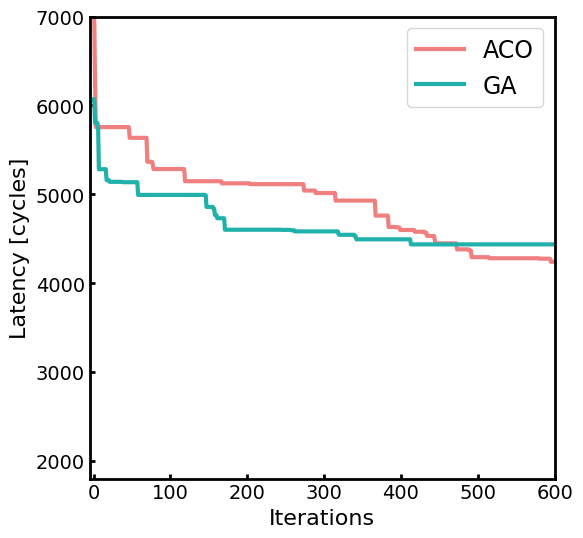

In [4]:
# Plot a bunch of convergence plots in the same figure
prefix = "../data"
# folders = ["/ACO_reduced", "/ACO_heuristic", "/GA_reduced"]
# labels = [r"ACO$_{random}$", r"ACO$_{improved}$", r"GA"]
folders = ["/ACO_spatial", "/GA_spatial"]
labels = [r"ACO", r"GA"]
stats = []

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
colors = ["lightcoral", "lightseagreen", "mediumpurple"]
for i,folder in enumerate(folders):
    folder = prefix + folder
    stats.append(np.load(folder+"/statistics.npy", allow_pickle=True).item())
    mean_values = np.array(stats[-1]["mdn"])
    std_values = np.array(stats[-1]["std"])
    best_values = np.array(stats[-1]["best"])
    best_values = np.array(stats[-1]["absolute_best"])
    print(best_values[-1])
    
    # best_values = np.array([stats["absolute_best"][i][2] for i in range(1,len(stats["best"]))])

    if "GA" in folder:
        best_values = np.array(stats[-1]["best"])

    name = folder.split("/")[-1]
    

    # add best line
    ax.plot(best_values, label=labels[i], color = colors[i], linewidth=3)
ax.set_xlim(-5, len(mean_values))
ax.set_ylim(1800, 7000)
ax.tick_params(direction='in')
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
ax.tick_params(axis='both', which='major', labelsize=14)


plt.legend(fontsize=17)
plt.xlabel("Iterations", fontdict={"size": 16})
plt.ylabel("Latency [cycles]", fontdict={"size": 16})
# plt.title("convergence", fontdict={"size": 16})
